In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
from glob import glob
import seaborn as sns
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **In this part, the binary classification of psoriasis and similar conditions is performed.**

In [4]:
train_path = '/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/train'
test_path = '/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/test'

In [5]:
folders = glob('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/train/*')
print(len(folders))

2


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255)

In [7]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=1,
                                                shuffle=False,
                                                 class_mode = 'categorical')

Found 1680 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=1,
                                            class_mode = 'categorical')

Found 420 images belonging to 2 classes.


In [10]:
train_set_fold=[]
for i in range(len(train_set)):
  a=train_set[i][0][0]
  train_set_fold.append(a)

In [11]:
train_set_fold=np.array(train_set_fold)

In [12]:
test_set_fold=[]
for i in range(len(test_set)):
  a=test_set[i][0][0]
  test_set_fold.append(a)

In [13]:
test_set_fold=np.array(test_set_fold)

In [14]:
input_tensor=Input(shape=(224,224,3))

In [15]:
model1 = ResNet50V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model1.layers:
  layer.tranable=True

In [16]:
x = GlobalAveragePooling2D(name='Pooling')(model1.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(1,activation='sigmoid', name='fc2')(x)
model1 = Model(inputs=input_tensor, outputs=x)

In [17]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [18]:
sgd = optimizers.SGD()
model1.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [19]:
from sklearn.model_selection import StratifiedKFold

In [28]:
import tensorflow as tf
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
   # y_train=tf.keras.utils.to_categorical(y_train)
    #y_test=tf.keras.utils.to_categorical(y_test)
    model1_history=model1.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10,verbose=1)


Epoch 1/10
42/42 [==============================] - 49s 670ms/step - loss: 0.5765 - accuracy: 0.6920 - val_loss: 0.4407 - val_accuracy: 0.7887
Epoch 2/10
42/42 [==============================] - 26s 620ms/step - loss: 0.2718 - accuracy: 0.9010 - val_loss: 0.3657 - val_accuracy: 0.8661
Epoch 3/10
42/42 [==============================] - 26s 623ms/step - loss: 0.1412 - accuracy: 0.9650 - val_loss: 0.3708 - val_accuracy: 0.8452
Epoch 4/10
42/42 [==============================] - 26s 618ms/step - loss: 0.0935 - accuracy: 0.9769 - val_loss: 0.3827 - val_accuracy: 0.8482
Epoch 5/10
42/42 [==============================] - 26s 623ms/step - loss: 0.0474 - accuracy: 0.9963 - val_loss: 0.3779 - val_accuracy: 0.8720
Epoch 6/10
42/42 [==============================] - 26s 619ms/step - loss: 0.0372 - accuracy: 0.9970 - val_loss: 0.3539 - val_accuracy: 0.8810
Epoch 7/10
42/42 [==============================] - 26s 623ms/step - loss: 0.0254 - accuracy: 0.9970 - val_loss: 0.4116 - val_accuracy: 0.8690

In [26]:
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 420 images belonging to 2 classes.


In [30]:
predictions1=model1.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds1=[]
for i in range(len(predictions1)):
  if predictions1[i]>=0.5:
    preds1.append(1)
  else:
    preds1.append(0)

420/420 [==============================] - 11s 22ms/step


0.861904761904762

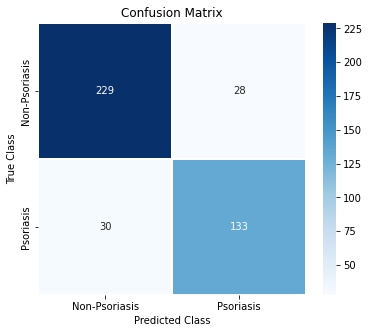

In [31]:
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds1)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds1)

In [32]:
model1.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_Binary_cross.hdf5')

In [36]:
model2 = ResNet101V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model2.layers:
  layer.tranable=True

171327488/171317808 [==============================] - 1s 0us/step


In [37]:
x = GlobalAveragePooling2D(name='Pooling')(model2.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(1,activation='sigmoid', name='fc2')(x)
model2 = Model(inputs=input_tensor, outputs=x)

In [38]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [39]:
model2.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [40]:
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
   # y_train=tf.keras.utils.to_categorical(y_train)
    #y_test=tf.keras.utils.to_categorical(y_test)
    model2_history=model2.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10,verbose=1)

Epoch 1/10
42/42 [==============================] - 60s 1s/step - loss: 0.5582 - accuracy: 0.7016 - val_loss: 0.5883 - val_accuracy: 0.7351
Epoch 2/10
42/42 [==============================] - 46s 1s/step - loss: 0.2422 - accuracy: 0.9040 - val_loss: 0.4279 - val_accuracy: 0.8333
Epoch 3/10
42/42 [==============================] - 46s 1s/step - loss: 0.1179 - accuracy: 0.9702 - val_loss: 0.4603 - val_accuracy: 0.8512
Epoch 4/10
42/42 [==============================] - 46s 1s/step - loss: 0.0616 - accuracy: 0.9918 - val_loss: 0.4738 - val_accuracy: 0.8512
Epoch 5/10
42/42 [==============================] - 46s 1s/step - loss: 0.0361 - accuracy: 0.9978 - val_loss: 0.4139 - val_accuracy: 0.8690
Epoch 6/10
42/42 [==============================] - 46s 1s/step - loss: 0.0232 - accuracy: 0.9993 - val_loss: 0.3751 - val_accuracy: 0.8899
Epoch 7/10
42/42 [==============================] - 46s 1s/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.3593 - val_accuracy: 0.8810
Epoch 8/10
42/42 [==

In [ ]:
# Making Predictions
predictions2=model2.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds2=[]
for i in range(len(predictions2)):
  if predictions2[i]>=0.5:
    preds2.append(1)
  else:
    preds2.append(0)


0.8809523809523809

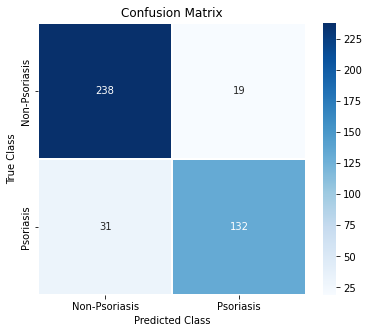

In [42]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds2)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds2)

In [43]:
model2.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_cross.hdf5')

In [20]:
model3 = ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model3.layers:
  layer.tranable=True

In [21]:
x = GlobalAveragePooling2D(name='Pooling')(model3.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(1,activation='sigmoid', name='fc2')(x)
model3 = Model(inputs=input_tensor, outputs=x)

In [22]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [23]:
model3.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [24]:
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
   # y_train=tf.keras.utils.to_categorical(y_train)
    #y_test=tf.keras.utils.to_categorical(y_test)
    model3_history=model3.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10 ,verbose=1)

Epoch 1/10
42/42 [==============================] - 104s 2s/step - loss: 0.5465 - accuracy: 0.7158 - val_loss: 0.4756 - val_accuracy: 0.7440
Epoch 2/10
42/42 [==============================] - 68s 2s/step - loss: 0.2528 - accuracy: 0.9129 - val_loss: 0.4174 - val_accuracy: 0.8095
Epoch 3/10
42/42 [==============================] - 68s 2s/step - loss: 0.1272 - accuracy: 0.9628 - val_loss: 0.4197 - val_accuracy: 0.8244
Epoch 4/10
42/42 [==============================] - 68s 2s/step - loss: 0.0828 - accuracy: 0.9799 - val_loss: 0.3933 - val_accuracy: 0.8631
Epoch 5/10
42/42 [==============================] - 68s 2s/step - loss: 0.0346 - accuracy: 0.9978 - val_loss: 0.3604 - val_accuracy: 0.8750
Epoch 6/10
42/42 [==============================] - 68s 2s/step - loss: 0.0288 - accuracy: 0.9963 - val_loss: 0.3854 - val_accuracy: 0.8780
Epoch 7/10
42/42 [==============================] - 68s 2s/step - loss: 0.0195 - accuracy: 0.9978 - val_loss: 0.4235 - val_accuracy: 0.8542
Epoch 8/10
42/42 [=

In [28]:
# Making Predictions
predictions3=model3.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds3=[]
for i in range(len(predictions3)):
  if predictions3[i]>=0.5:
    preds3.append(1)
  else:
    preds3.append(0)

420/420 [==============================] - 28s 57ms/step


0.8738095238095238

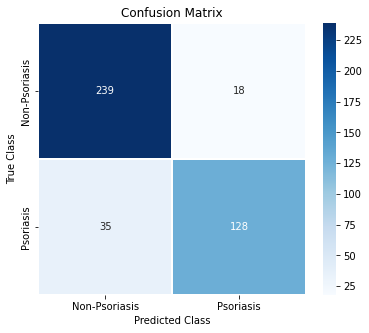

In [29]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds3)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds3)

In [30]:
model3.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_Binary_cross.hdf5')

In [31]:
model1=load_model('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_Binary_cross.hdf5')
model2=load_model('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_cross.hdf5')

In [33]:
models = [model1, model2, model3]
preds_1 = [model.predict(test_set_evaluation) for model in models]
preds_1=np.array(preds_1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
            wted_ensemble_pred=[]
            for i in range(len(wted_preds1)):
              if  wted_preds1[i]>=0.5:
                wted_ensemble_pred.append(1)
              else:
                wted_ensemble_pred.append(0)

            weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                          'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])    

Max accuracy of  89.76190476190476  obained with w1= 0.1  w2= 0.4  and w3= 0.4


In [34]:
models = [model1, model2, model3]
preds = [model.predict(test_set_evaluation) for model in models]
preds=np.array(preds)
ideal_weights = [max_acc_row[0], max_acc_row[1], max_acc_row[2]] 
np.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/weights_binary_cross.npy', ideal_weights)
#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)

[Text(0, 0.5, 'Non-Psoriasis'), Text(0, 1.5, 'Psoriasis')]

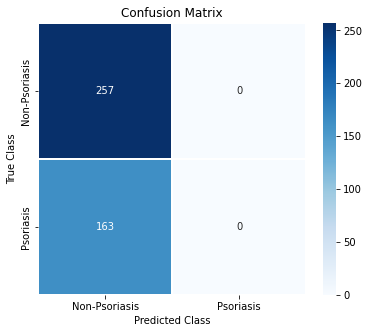

In [35]:
cf_matrix=confusion_matrix(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])

### **In this part, the multi-class classification of variants of psoriasis is performed.**

In [41]:
train_path = '/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/train'
test_path = '/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/test'

In [42]:
folders = glob('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/train/*')
print(len(folders))

7


In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255)

In [44]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [45]:
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=1,
                                                shuffle=False,
                                                 class_mode = 'categorical')

Found 649 images belonging to 7 classes.


In [46]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=1,
                                            class_mode = 'categorical')

Found 164 images belonging to 7 classes.


In [47]:
train_set_fold=[]
for i in range(len(train_set)):
  a=train_set[i][0][0]
  train_set_fold.append(a)

In [48]:
train_set_fold=np.array(train_set_fold)

In [49]:
test_set_fold=[]
for i in range(len(test_set)):
  a=test_set[i][0][0]
  test_set_fold.append(a)

In [50]:
test_set_fold=np.array(test_set_fold)

In [51]:
input_tensor=Input(shape=(224,224,3))

In [52]:
model1 = ResNet50V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model1.layers:
  layer.tranable=True

In [53]:
x = GlobalAveragePooling2D(name='Pooling')(model1.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model1 = Model(inputs=input_tensor, outputs=x)

In [54]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [55]:
model1.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [56]:
import tensorflow as tf
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
    y_train=tf.keras.utils.to_categorical(y_train)
    y_test=tf.keras.utils.to_categorical(y_test)
    model1_history=model1.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10,verbose=1)

Epoch 1/10
17/17 [==============================] - 21s 830ms/step - loss: 1.4752 - accuracy: 0.4644 - val_loss: 1.5761 - val_accuracy: 0.4769
Epoch 2/10
17/17 [==============================] - 10s 591ms/step - loss: 0.6498 - accuracy: 0.7726 - val_loss: 1.6588 - val_accuracy: 0.4923
Epoch 3/10
17/17 [==============================] - 10s 591ms/step - loss: 0.3339 - accuracy: 0.9210 - val_loss: 1.2704 - val_accuracy: 0.5923
Epoch 4/10
17/17 [==============================] - 10s 595ms/step - loss: 0.2424 - accuracy: 0.9499 - val_loss: 1.3741 - val_accuracy: 0.5538
Epoch 5/10
17/17 [==============================] - 10s 594ms/step - loss: 0.1544 - accuracy: 0.9750 - val_loss: 1.4812 - val_accuracy: 0.4462
Epoch 6/10
17/17 [==============================] - 10s 595ms/step - loss: 0.1235 - accuracy: 0.9750 - val_loss: 1.3532 - val_accuracy: 0.5385
Epoch 7/10
17/17 [==============================] - 10s 595ms/step - loss: 0.0912 - accuracy: 0.9807 - val_loss: 1.5384 - val_accuracy: 0.5077

In [57]:
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 164 images belonging to 7 classes.


In [58]:
model1.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

164/164 [==============================] - 6s 29ms/step - loss: 0.5321 - accuracy: 0.8537


[0.5320703387260437, 0.8536585569381714]

In [59]:
# Making Predictions
predictions1=model1.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds1=np.argmax(predictions1, axis=1)

164/164 [==============================] - 5s 21ms/step


0.8536585365853658

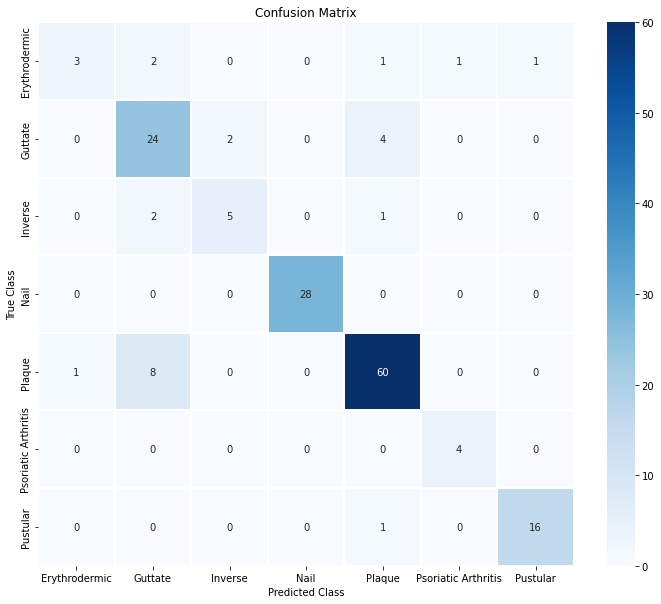

In [60]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds1)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds1)

In [61]:
model1.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_MultiClass_cross.hdf5')

In [62]:
model2 = ResNet101V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model2.layers:
  layer.tranable=True

In [63]:
x = GlobalAveragePooling2D(name='Pooling')(model2.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model2 = Model(inputs=input_tensor, outputs=x)

In [64]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [65]:
model2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [66]:
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
    y_train=tf.keras.utils.to_categorical(y_train)
    y_test=tf.keras.utils.to_categorical(y_test)
    model2_history=model2.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10,verbose=1)

Epoch 1/10
17/17 [==============================] - 35s 1s/step - loss: 1.4884 - accuracy: 0.4682 - val_loss: 1.2468 - val_accuracy: 0.5308
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.6209 - accuracy: 0.8035 - val_loss: 1.3545 - val_accuracy: 0.5769
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.3278 - accuracy: 0.9210 - val_loss: 1.3523 - val_accuracy: 0.5538
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.1983 - accuracy: 0.9634 - val_loss: 1.1608 - val_accuracy: 0.6000
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.1586 - accuracy: 0.9672 - val_loss: 1.3795 - val_accuracy: 0.5846
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.1025 - accuracy: 0.9827 - val_loss: 1.2544 - val_accuracy: 0.5769
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.0765 - accuracy: 0.9942 - val_loss: 1.2471 - val_accuracy: 0.5923
Epoch 8/10
17/17 [==

In [67]:
model2.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

164/164 [==============================] - 10s 50ms/step - loss: 0.6485 - accuracy: 0.8293


[0.6485448479652405, 0.8292682766914368]

In [68]:
# Making Predictions
predictions2=model2.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds2=np.argmax(predictions2, axis=1)

164/164 [==============================] - 9s 39ms/step


0.8292682926829268

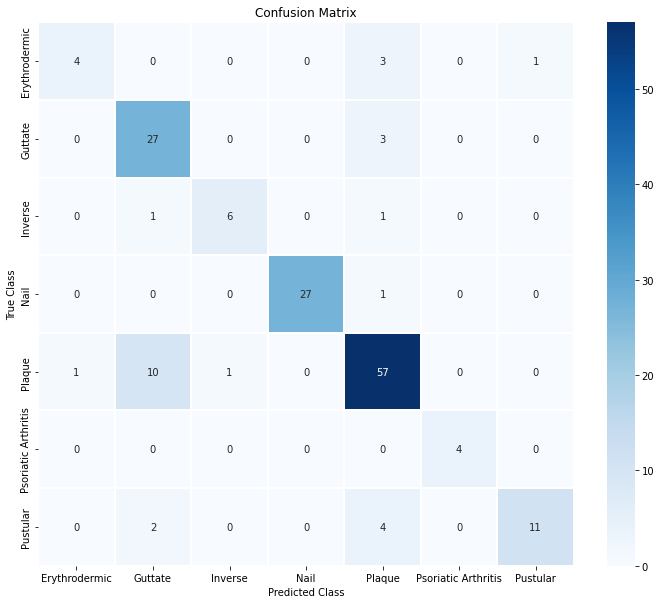

In [69]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds2)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds2)

In [70]:
model2.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_MultiClass_cross.hdf5')

In [71]:
model3 = ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model3.layers:
  layer.tranable=True

In [72]:
x = GlobalAveragePooling2D(name='Pooling')(model3.output)
x = Flatten(name='flatten')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model3 = Model(inputs=input_tensor, outputs=x)

In [73]:
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [74]:
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [75]:
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(train_set_fold, train_set.classes):
    x_train, x_test = train_set_fold[train_index], train_set_fold[test_index]
    y_train, y_test = train_set.classes[train_index], train_set.classes[test_index]
    y_train=tf.keras.utils.to_categorical(y_train)
    y_test=tf.keras.utils.to_categorical(y_test)
    model3_history=model3.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10,verbose=1)

Epoch 1/10
17/17 [==============================] - 52s 2s/step - loss: 1.4606 - accuracy: 0.4875 - val_loss: 1.4422 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 27s 2s/step - loss: 0.5867 - accuracy: 0.8092 - val_loss: 1.4934 - val_accuracy: 0.5308
Epoch 3/10
17/17 [==============================] - 26s 2s/step - loss: 0.3350 - accuracy: 0.9152 - val_loss: 1.4976 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 26s 2s/step - loss: 0.1921 - accuracy: 0.9692 - val_loss: 1.5080 - val_accuracy: 0.4846
Epoch 5/10
17/17 [==============================] - 26s 2s/step - loss: 0.1567 - accuracy: 0.9672 - val_loss: 1.4561 - val_accuracy: 0.5231
Epoch 6/10
17/17 [==============================] - 26s 2s/step - loss: 0.1095 - accuracy: 0.9788 - val_loss: 1.1561 - val_accuracy: 0.5692
Epoch 7/10
17/17 [==============================] - 26s 2s/step - loss: 0.0944 - accuracy: 0.9865 - val_loss: 1.2509 - val_accuracy: 0.6000
Epoch 8/10
17/17 [==

In [76]:
model3.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

164/164 [==============================] - 15s 69ms/step - loss: 0.4471 - accuracy: 0.8537


[0.44707760214805603, 0.8536585569381714]

In [77]:
# Making Predictions
predictions3=model3.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds3=np.argmax(predictions3, axis=1)

164/164 [==============================] - 13s 57ms/step


0.8536585365853658

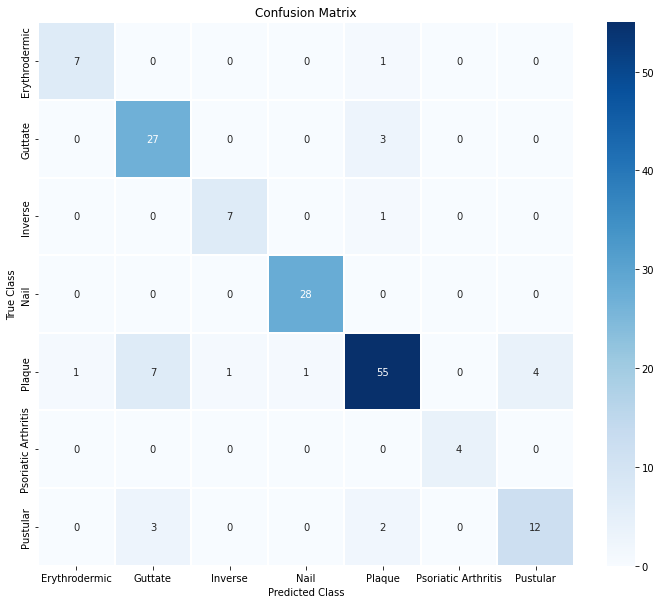

In [78]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds3)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds3)

In [79]:
model3.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_MultiClass_cross.hdf5')

In [80]:
models = [model1, model2, model3]
preds_1 = [model.predict(test_set_evaluation) for model in models]
preds_1=np.array(preds_1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                          'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])    

Max accuracy of  88.41463414634147  obained with w1= 0.1  w2= 0.0  and w3= 0.2


In [81]:
networks = [model1, model2, model3]
preds = [network.predict(test_set_evaluation) for network in networks]
preds=np.array(preds)
ideal_weights = [max_acc_row[0], max_acc_row[1], max_acc_row[2]] 
np.save('/content/drive/MyDrive/Papers/Psoriasis_CAD/Research Group UT SUT UoA/Technical Calculations/weights_MultiClass_cross.npy', ideal_weights)
#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)

[Text(0, 0.5, 'Erythrodermic'),
 Text(0, 1.5, 'Guttate'),
 Text(0, 2.5, 'Inverse'),
 Text(0, 3.5, 'Nail'),
 Text(0, 4.5, 'Plaque'),
 Text(0, 5.5, 'Psoriatic Arthritis'),
 Text(0, 6.5, 'Pustular')]

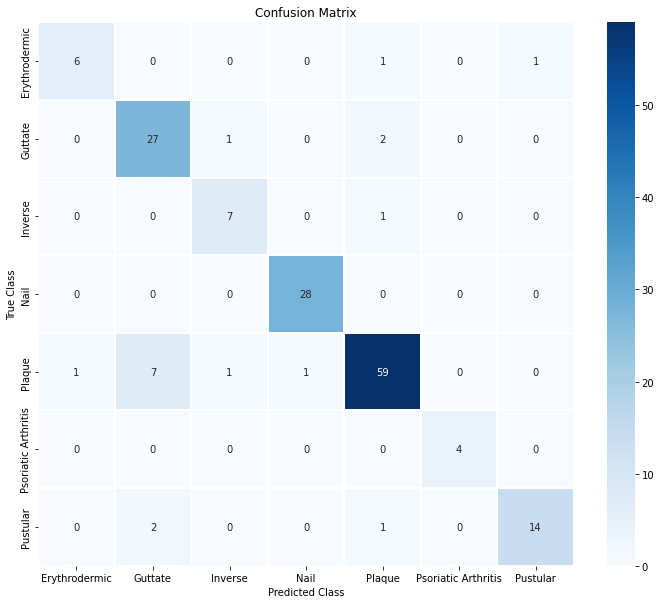

In [82]:
cf_matrix=confusion_matrix(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])